# Amazon Best-Selling Books

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #only need py plot
sb.set() #set the graphics for seaborn

### Clean the data

In [2]:
#read the csv file and convert to dataframe
amazonbooks=pd.read_csv('bestsellers with categories.csv')
amazonbooks.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [3]:
print("(Rows,Columns):", amazonbooks.shape)

(Rows,Columns): (550, 7)


In [4]:
#check for duplicates, if no duplicates, 'name' column is unique hence True
amazonbooks['Name'].is_unique

False

In [5]:
#drop duplicates based on same name and author
amazonbooks = amazonbooks.drop_duplicates(['Name','Author'], keep='last')
amazonbooks['Name'].is_unique

True

In [6]:
print("(Rows,Columns):", amazonbooks.shape)

(Rows,Columns): (351, 7)


In [7]:
#check for any missing values 
amazonbooks.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [8]:
#no missing values 

In [9]:
#check correct data types
amazonbooks.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

### Analysis of Data

### Question 1: The best selling books of 2010s

In [10]:
#drop year 2009
amazondecade = pd.DataFrame(amazonbooks)
amazondecade.shape #check

(351, 7)

In [11]:
#dropped 2009
amazondecade.drop(amazondecade.loc[amazondecade['Year']== 2009].index, inplace=True)
amazondecade.shape

(313, 7)

In [12]:
#check if 2009 exists
exists = 2009 in amazondecade.Year
print(exists)

False


In [13]:
#Most Reviews means most best selling boooks #list top 10
amazondecade = amazondecade.sort_values(["Reviews"], ascending = (False))
amazondecade = amazondecade.head(10)
amazondecade

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
438,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2016,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


In [14]:
#rename fifty shades (too long)
amazondecade = amazondecade.replace(['Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)'],
                                    'Fifty Shades of Grey: Book One')
amazondecade

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
438,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2016,Fiction
107,Fifty Shades of Grey: Book One,E L James,3.8,47265,14,2013,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


[Text(0, 0.5, '')]

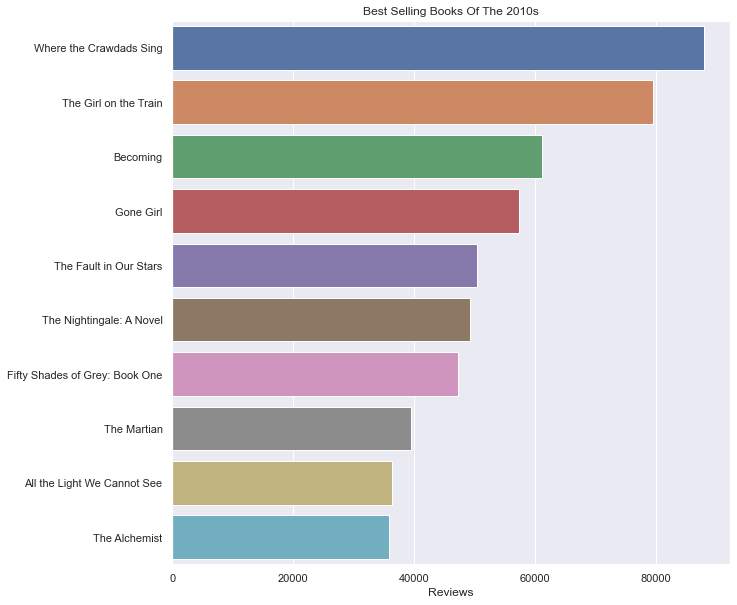

In [15]:
f,axes = plt.subplots(1,1, figsize = (10,10))
plt.title("Best Selling Books Of The 2010s")
box = sb.barplot(x="Reviews", y="Name", data=amazondecade)
box.set(ylabel=None)

The best selling books for the 2010s is **"When the Crawdads Sing"** with **87841** reviews

### Question 2: Does higher user ratings means more reviews?

<AxesSubplot:xlabel='Reviews', ylabel='User Rating'>

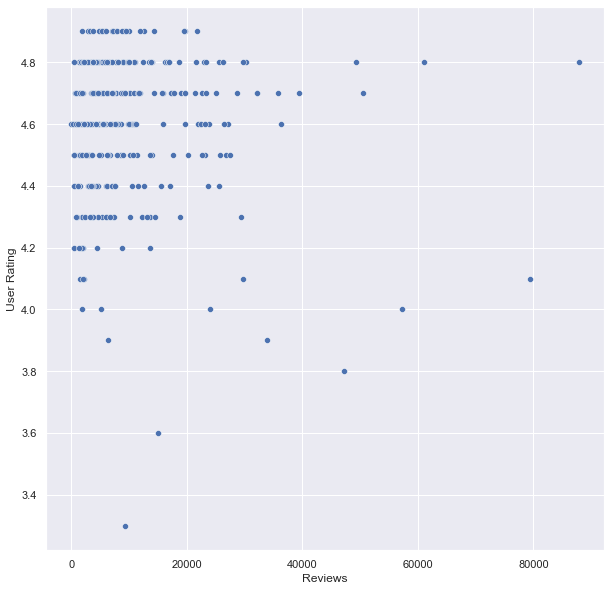

In [16]:
amazoncompare = pd.DataFrame(amazonbooks[['Reviews', 'User Rating']])
f,axes = plt.subplots(1,1, figsize = (10,10))
sb.scatterplot(data=amazoncompare, x="Reviews", y="User Rating")

<AxesSubplot:>

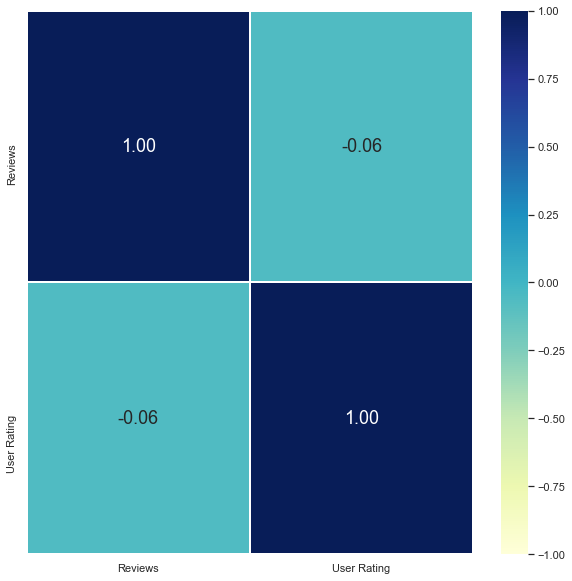

In [17]:
f,axes = plt.subplots(1,1, figsize=(10,10))
sb.heatmap(amazoncompare.corr(), vmin=-1, vmax=1, linewidths=1, annot=True, fmt=".2f", annot_kws={'size':18}, cmap="YlGnBu")

User Rating is **not** a good predictor for Number of Reviews

### Question 3: Does Non-Fiction or Fiction sell better for the 2010s?

In [18]:
# group nescceary terms
amazonbooks.drop(amazonbooks.loc[amazonbooks['Year']== 2009].index, inplace=True)
amazonNFF = amazonbooks.groupby(['Year','Genre']).sum()
amazonNFF.drop(['Price','User Rating'], axis=1)

Reviews
Year Genre               
2010 Fiction        80533
     Non Fiction    37679
2011 Fiction        99150
     Non Fiction    37408
2012 Fiction       216721
     Non Fiction   125495
2013 Fiction       178064
     Non Fiction    83855
2014 Fiction       350418
     Non Fiction    74981
2015 Fiction       160071
     Non Fiction   115650
2016 Fiction       208843
     Non Fiction   132675
2017 Fiction       186368
     Non Fiction   105401
2018 Fiction       139414
     Non Fiction   173039
2019 Fiction       370143
     Non Fiction   417378

<AxesSubplot:title={'center':'Best Selling Genre Of The 2010s'}, xlabel='Year', ylabel='Reviews'>

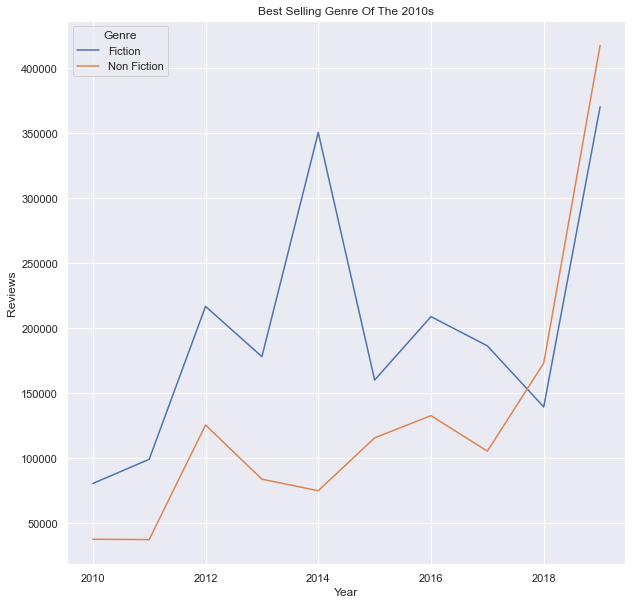

In [19]:
f,axes = plt.subplots(1,1, figsize=(10,10))
plt.title("Best Selling Genre Of The 2010s")
sb.lineplot(data=amazonNFF, x="Year", y="Reviews", hue="Genre")

### Question 4: Which Author is the most profitable for the 2010s?

In [20]:
#group nesscary terms
amazonbooks.drop(amazonbooks.loc[amazonbooks['Year']== 2009].index, inplace=True)
amazonauthors = amazonbooks.groupby(['Author']).sum()
amazonauthors = amazonauthors.sort_values(["Reviews"], ascending = (False))

In [21]:
amazonauthors

,User Rating,Reviews,Price,Year
Author,,,,
E L James,21.6,130746,78,10064
Suzanne Collins,23.4,130548,71,10058
Delia Owens,4.8,87841,15,2019
Paula Hawkins,4.1,79446,7,2016
J.K. Rowling,26.7,70535,121,12093
...,...,...,...,...
Glenn Beck,4.5,471,8,2010
Larry Schweikart,4.6,460,2,2010
Jon Stewart,4.4,440,11,2010


In [22]:
amazonauthors = amazonauthors.drop(['Price','User Rating','Year'], axis=1)
amazonauthors

,Reviews
Author,
E L James,130746
Suzanne Collins,130548
Delia Owens,87841
Paula Hawkins,79446
J.K. Rowling,70535
...,...
Glenn Beck,471
Larry Schweikart,460
Jon Stewart,440


In [23]:
amazonauthors.describe()

,Reviews
count,231.000000
mean,14256.649351
std,18195.847077
min,220.000000
25%,4595.500000
50%,8837.000000
75%,16443.500000
max,130746.000000


In [24]:
amazonauthors.dtypes

Reviews    int64
dtype: object

In [25]:
print("Number of Authors:", amazonauthors['Reviews'].count())

Number of Authors: 231


In [26]:
amazonauthors = amazonauthors.head(10)
amazonauthors

,Reviews
Author,
E L James,130746
Suzanne Collins,130548
Delia Owens,87841
Paula Hawkins,79446
J.K. Rowling,70535
Michelle Obama,61133
John Grisham,60961
Jeff Kinney,60464
John Green,58973


<AxesSubplot:xlabel='Author'>

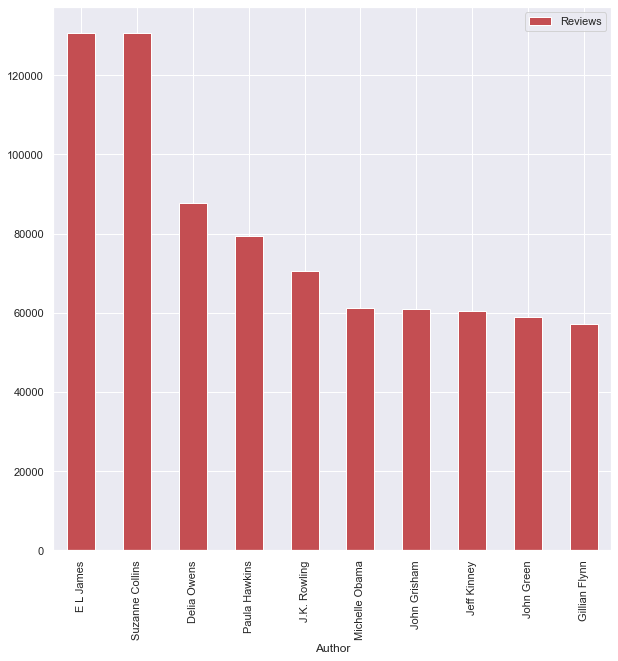

In [27]:
amazonauthors
amazonauthors.plot(kind='bar', figsize=(10,10), color='r')

### Question 5: % of Non-Fiction to Fiction Books in Amazon of 2010s

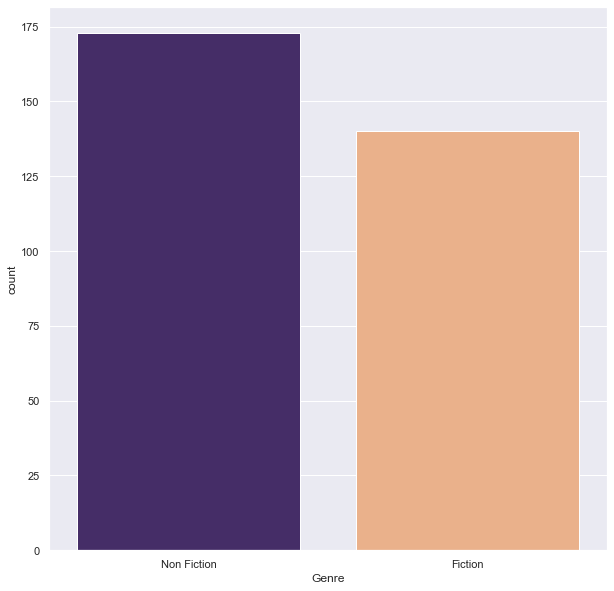

In [28]:
# do a count plot
f,axes = plt.subplots(1,1, figsize=(10,10))
ax = sb.countplot(x="Genre", data=amazonbooks, palette=['#432371',"#FAAE7B"])

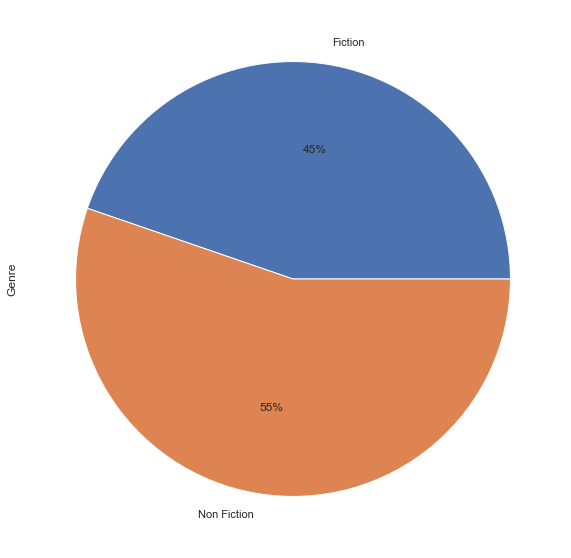

In [29]:
pie=amazonbooks.groupby("Genre")["Genre"].count().plot.pie(figsize=(10,10),autopct='%1.f%%')